In [5]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import starfile

In [39]:
relion_directory = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full").absolute()

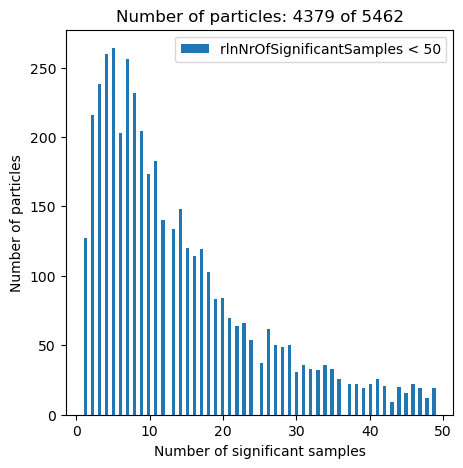

In [52]:
refinement_directory = relion_directory / "Refine3D" / "job352"
run_data_star = starfile.read(refinement_directory / "run_data.star")
run_data_optics = run_data_star["optics"]
run_data_particles = run_data_star["particles"]
#print(len(run_data_particles))
#print(run_data_particles.columns)
#run_data_particles["rlnNrOfSignificantSamples"].describe()
Nr_cutoff = 50
plot_df = run_data_particles["rlnNrOfSignificantSamples"][run_data_particles["rlnNrOfSignificantSamples"] < Nr_cutoff]

#fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
fig, ax2 = plt.subplots(1, 1, figsize=(5, 5))
# plot histogram of number of significant samples
#ax1.hist(run_data_particles["rlnNrOfSignificantSamples"], bins=1000)
#ax1.set_title(f"Total particles: {len(run_data_particles)}")
#ax1.set_xlabel("Number of significant samples")

ax2.hist(plot_df, bins=100, label=f"rlnNrOfSignificantSamples < {Nr_cutoff}")
ax2.set_title(f"Number of particles: {len(plot_df)} of {len(run_data_particles)}")
ax2.set_xlabel("Number of significant samples")
ax2.set_ylabel("Number of particles")
ax2.legend()

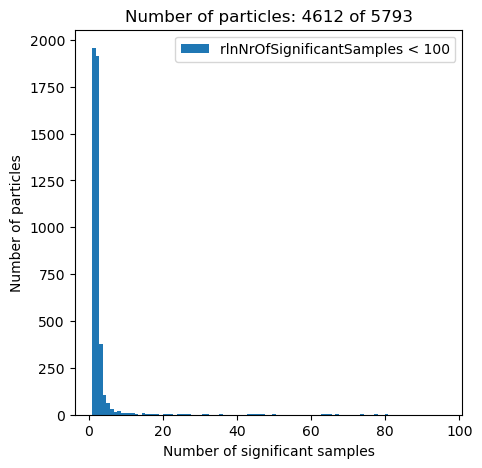

In [53]:
refinement_directory = relion_directory / "Refine3D" / "job351"
run_data_star = starfile.read(refinement_directory / "run_data.star")
run_data_optics = run_data_star["optics"]
run_data_particles = run_data_star["particles"]
#print(len(run_data_particles))
#print(run_data_particles.columns)
#run_data_particles["rlnNrOfSignificantSamples"].describe()
Nr_cutoff = 100
plot_df = run_data_particles["rlnNrOfSignificantSamples"][run_data_particles["rlnNrOfSignificantSamples"] < Nr_cutoff]

#fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
fig, ax2 = plt.subplots(1, 1, figsize=(5, 5))
# plot histogram of number of significant samples
#ax1.hist(run_data_particles["rlnNrOfSignificantSamples"], bins=1000)
#ax1.set_title(f"Total particles: {len(run_data_particles)}")
#ax1.set_xlabel("Number of significant samples")

ax2.hist(plot_df, bins=100, label=f"rlnNrOfSignificantSamples < {Nr_cutoff}")
ax2.set_title(f"Number of particles: {len(plot_df)} of {len(run_data_particles)}")
ax2.set_xlabel("Number of significant samples")
ax2.set_ylabel("Number of particles")
ax2.legend()

In [71]:
column_to_sort = "rlnLogLikeliContribution"
number_of_top_particles = 4000

refinement_directory = relion_directory / "Refine3D" / "job352"
#####
run_data_star = starfile.read(refinement_directory / "run_data.star")
run_data_optics = run_data_star["optics"]
run_data_particles = run_data_star["particles"]
# sort particles
run_data_particles = run_data_particles.sort_values(column_to_sort, ascending=False)
# select top 1000 particles
new_particles = run_data_particles.head(number_of_top_particles)
# write new star file
run_data_star["particles"] = new_particles
new_star_path = refinement_directory / f"run_data_top{number_of_top_particles}_{column_to_sort}.star"
starfile.write(run_data_star, new_star_path, overwrite=True)

PosixPath('/mnt/scratch/ribosomes/kas_k44a/relion_full/Refine3D/job352')

In [72]:
class_data_star = Path("/mnt/scratch/ribosomes/kas_k44a/relion_full/Class3D/job330/class7_it050_data.star")
class_data = starfile.read(class_data_star)
class_data_particles = class_data["particles"]

In [74]:
class_data_particles["rlnTomoName"].value_counts()  

rlnTomoName
ts_054    33
ts_055    22
ts_050    21
ts_085    20
ts_069    19
          ..
ts_068     1
ts_078     1
ts_081     1
ts_092     1
ts_123     1
Name: count, Length: 77, dtype: int64